# Predicting the Satisfaction Level of Airplane Passengers

#### Group Name: 
* Group 26

#### Name(s) & ID(s) of Group Members:
* Lai Pak Yin (s3827212)
* Weixi Guan (s3830776)
#### 

***
(Credit: A. C. & I. P.)

**DISCLAIMER:** Please do not assume this report is 100% accurate nor it fully satisfies all the project requirements for full credit.
***

## Table of Contents
* [Introduction](#Intro) 
  + [Dataset Source](#Source)
  + [Dataset Details](#Details)
  + [Dataset Variables](#Variables)
  + [Response Variable](#Response)
* [Goals & Objectives](#Goal)
* [Data Cleaning & Preprocessing](#Cleaning_And_Preprocessing)
* [Data Exploration and Visualisation](#Exploration_And_Visualisation)
* [Literature Review](#Review)
* [Summary and Conclusion](#Summary_And_Conclusion)
* [References](#References)



## Introduction <a id='Intro'></a>

### Dataset Source <a id='Source'></a>

The Airline Passenger Satisfaction dataset was sourced from Kaggle (Klein, 2019). This dataset contains an airline passenger satisfaction survey.

### Dataset Details <a id='Details'></a>

This dataset is about the satisfaction level of an Airline company. It contains information about factors that will affect the satisfaction level of customers. For example, seat comfort, inflight entertainment and on-board service are some factors that are included in the dataset. Also, customer's general information such as gender, age and type of travel are recorded in the dataset for more in-depth research. These features are sufficient and capable for predictive modeling of the satisfaction level of customers as a binary classification problem.

This dataset has 23 features and 129880 observations. All the data with no or incorrect information has been removed from this dataset.

### Dataset Variables <a id='Variables'></a>

All the features of the dataset are shown in the table below. The description of features are provided by Kaggle data source.

In [2]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['Gender','Nominal categorical','NA','Gender of the passengers (Female, Male)'],
         ['Customer type','Nominal categorical','NA','The customer type (Loyal customer, disloyal customer)'],
         ['Age','Numeric','Years Old','The actual age of the passengers'],
         ['Type of travel','Nominal categorical','NA','Purpose of the flight of the passengers \n(Personal Travel, Business Travel)'],
         ['Customer class','Nominal categorical','NA','Travel class in the plane of the passengers \n(Business, Eco, Eco Plus)'],
         ['Flight distance','Numeric','KM','The flight distance of this journey'],
         ['Inflight wifi service','Numeric','NA','Satisfaction level of the inflight wifi service \n(0:Not Applicable;1-5)'],
         ['Departure/Arrival time convenient','Numeric','NA','Satisfaction level of Departure/Arrival time convenient'],
         ['Ease of online booking','Numeric','NA','Satisfaction level of online booking'],
         ['Gate location','Numeric','NA','Satisfaction level of Gate location'],
         ['Food and drink','Numeric','NA','Satisfaction level of Food and drink'],
         ['Online boarding','Numeric','NA','Satisfaction level of online boarding'],
         ['Seat comfort','Numeric','NA','Satisfaction level of Seat comfort'],
         ['Inflight entertainment','Numeric','NA','Satisfaction level of inflight entertainment'],
         ['Onboard service','Numeric','NA','Satisfaction level of On-board service'],
         ['Leg room service','Numeric','NA','Satisfaction level of Leg room service'],
         ['Baggage handling','Numeric','NA','Satisfaction level of baggage handling'],
         ['Check in service','Numeric','NA','Satisfaction level of Check-in service'],
         ['Inflight service','Numeric','NA','Satisfaction level of inflight service'],
         ['Cleanliness','Numeric','NA','Satisfaction level of Cleanliness'],
         ['Departure delay in minutes','Numeric','Minutes','Minutes delayed when departure'],
         ['Arrive delay in minutes','Numeric','Minutes','Minutes delayed when Arrival'],
         ['Satisfaction','Nominal categorical','NA','Airline satisfaction level\n(Satisfaction, neutral or dissatisfaction)']]

print(tabulate(table, headers='firstrow', tablefmt='simple'))

Name                               Data Type            Units      Description
---------------------------------  -------------------  ---------  -------------------------------------------------------
Gender                             Nominal categorical  NA         Gender of the passengers (Female, Male)
Customer type                      Nominal categorical  NA         The customer type (Loyal customer, disloyal customer)
Age                                Numeric              Years Old  The actual age of the passengers
Type of travel                     Nominal categorical  NA         Purpose of the flight of the passengers
                                                                   (Personal Travel, Business Travel)
Customer class                     Nominal categorical  NA         Travel class in the plane of the passengers
                                                                   (Business, Eco, Eco Plus)
Flight distance                    Numeric              K

### Response Variable <a id='Response'></a>

For this project, the target feature in this dataset will be predicting passenger satisfaction. The satisfaction level will be predicted based on the explanatory and descriptive variables in the dataset.

## Goals & Objectives <a id='Goal'></a>

Airlines are very important for people who travel around very often. The satisfaction level of passengers become a key factor for them while choosing an airline to travel with. For this reason, a model that can predict passenger's satisfaction level will be useful. For example, airlines can earn more income by improving their service using the predictive model. Likewise, using the predictive model can benefit passengers by increase the quality of service. More importantly, airlines can maintain a good reputation and become more competitive in the market.

For this project, there are two main objectives: (1) predict passenger satisfaction by establish a predictive model and (2) look for factors lead to customer satisfaction for an Airline. By analysing the data with descriptive statistics & data visualisation plot, cleaning & preprocessing the dataset, we can have an insight overview about the pattern and relationship between data which is our goal for Phase1. 


## Data Cleaning & Preprocessing <a id='Cleaning_And_Preprocessing'></a>

In this section, we describe the data cleaning and preprocessing steps undertaken for this project.

### Data Retrieval

- We read in the dataset from Phase1_Group26.csv in our GitHub repository and load the modules we will use throughout this report.
- We display 10 randomly sampled rows from this dataset.

In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# Name of the dataset
df_name = 'Phase1_Group26.csv'

In [4]:
csc = pd.read_csv(df_name)
csc.sample(10, random_state=999)

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
117352,Male,Loyal Customer,41,Business travel,Eco,996,5,4,2,4,...,5,4,2,1,5,5,5,80,62.0,satisfied
75928,Male,Loyal Customer,38,Business travel,Business,3463,5,5,5,5,...,5,5,5,5,2,5,2,0,0.0,satisfied
26682,Male,Loyal Customer,36,Personal Travel,Eco,361,1,5,4,3,...,2,4,2,5,4,4,2,0,3.0,neutral or dissatisfied
47086,Male,Loyal Customer,15,Personal Travel,Eco,216,4,4,4,2,...,4,3,5,4,5,4,4,0,2.0,neutral or dissatisfied
95174,Male,Loyal Customer,65,Personal Travel,Eco,257,2,5,2,5,...,4,1,1,1,1,5,4,0,0.0,neutral or dissatisfied
69597,Female,Loyal Customer,31,Business travel,Business,616,1,4,4,4,...,1,4,3,3,3,3,1,51,41.0,neutral or dissatisfied
103699,Male,Loyal Customer,41,Business travel,Business,3127,2,2,2,2,...,4,4,4,5,3,4,4,0,0.0,satisfied
72511,Female,Loyal Customer,62,Business travel,Eco,460,2,1,1,1,...,2,2,2,2,3,2,2,73,63.0,neutral or dissatisfied
2537,Male,Loyal Customer,53,Business travel,Business,715,1,1,2,1,...,4,4,4,4,3,4,3,5,8.0,satisfied
122009,Male,disloyal Customer,29,Business travel,Eco,114,2,3,2,3,...,4,4,4,1,1,2,4,0,0.0,neutral or dissatisfied


### Data Cleaning

*   Drop irrelevant features in our dataset
*   Check and rename/ modify some column names
*   Check for missing values
*   Remove all the rows with missing values 
*   Random sampling of the dataset for 5000 rows

Displaying all the columns in our dataset.

In [5]:
list(csc.columns)

['Gender',
 'customer_type',
 'age',
 'type_of_travel',
 'customer_class',
 'flight_distance',
 'inflight_wifi_service',
 'departure_arrival_time_convenient',
 'ease_of_online_booking',
 'gate_location',
 'food_and_drink',
 'online_boarding',
 'seat_comfort',
 'inflight_entertainment',
 'onboard_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'inflight_service',
 'cleanliness',
 'departure_delay_in_minutes',
 'arrival_delay_in_minutes',
 'satisfaction']

`inflight_wifi_service`, `inflight_entertainment`,`food_and_drink` and `leg_room_service` are parts of the `inflight_service`, thus they are considered redundant for the model and removed. `ease_of_online_booking`, `online_boarding`, `baggage_handling` and `checkin_service` are parts of the `onboard_service`, which are also the same as `onboard_service` feature, thus they are also considered redundant and removed. 

In [6]:
# Drop irrelevant/repeated columns/features
csc = csc.drop(columns=["inflight_wifi_service", 
                        "inflight_entertainment", 
                        "food_and_drink", 
                        "leg_room_service", 
                        "ease_of_online_booking",
                        "online_boarding",
                        "baggage_handling",
                        "checkin_service"]) 

As this project contains 'Gender', we have to make sure there will be 'Female' and 'Male' instead of 'F' and 'M' respectively.

In [7]:
# Replace 'F' and 'M' with 'Female' and 'Male' respectively
csc['Gender'] = csc['Gender'].replace({'M':'Male', 'F':'Female'})

One of the columns are not labeled properly, which will be problematic when modeling. We will make all column names lower case for consistency. We will also remove any white spaces before & after column names.

In [8]:
# Make column names lower case
# Remove any white spaces before & after the column names
csc.columns = csc.columns.str.lower().str.strip()
csc.sample(5, random_state=999)

,gender,customer_type,age,type_of_travel,customer_class,flight_distance,departure_arrival_time_convenient,gate_location,seat_comfort,onboard_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
117352,Male,Loyal Customer,41,Business travel,Eco,996,4,4,5,4,5,5,80,62.0,satisfied
75928,Male,Loyal Customer,38,Business travel,Business,3463,5,5,5,5,5,2,0,0.0,satisfied
26682,Male,Loyal Customer,36,Personal Travel,Eco,361,5,3,2,4,4,2,0,3.0,neutral or dissatisfied
47086,Male,Loyal Customer,15,Personal Travel,Eco,216,4,2,4,3,4,4,0,2.0,neutral or dissatisfied
95174,Male,Loyal Customer,65,Personal Travel,Eco,257,5,5,4,1,5,4,0,0.0,neutral or dissatisfied


Next, we check the data types and observe that they match the intended data types, thus no change is needed here. 

In [9]:
# Check for data types
print(f"Shape of the dataset = {csc.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(csc.dtypes)

Shape of the dataset = (129880, 15) 

Data types are below where 'object' indicates a string type: 
gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
customer_class                        object
flight_distance                        int64
departure_arrival_time_convenient      int64
gate_location                          int64
seat_comfort                           int64
onboard_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
satisfaction                          object
dtype: object


The unique values for all columns with categorical data types are displayed to check for any white spaces and other data quality issues. It turns out that the data is already clean, and no further data cleaning steps are necessary here. 

The summary statistics are generated for all the categorical features.

In [10]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of categorical features</b>'))
csc.describe(include='object').T

,count,unique,top,freq
gender,129880,2,Female,65899
customer_type,129880,2,Loyal Customer,106100
type_of_travel,129880,2,Business travel,89693
customer_class,129880,3,Business,62160
satisfaction,129880,2,neutral or dissatisfied,73452


In [11]:
# To see all unique values for categorical data types
categorical_Columns = csc.columns[csc.dtypes==object].tolist()

for col in categorical_Columns:
    print('Unique values for', col, end=': ')
    print(list(csc[col].unique()))
    print('')

Unique values for gender: ['Male', 'Female']

Unique values for customer_type: ['Loyal Customer', 'disloyal Customer']

Unique values for type_of_travel: ['Personal Travel', 'Business travel']

Unique values for customer_class: ['Eco Plus', 'Business', 'Eco']

Unique values for satisfaction: ['neutral or dissatisfied', 'satisfied']



The summary statistics are generated for all the numerical features.

In [12]:
display(HTML('<b>Table 2: Summary of numerical features</b>'))
csc.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
flight_distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
departure_arrival_time_convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
gate_location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
seat_comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
onboard_service,129880.0,3.383023,1.287099,0.0,2.0,4.0,4.0,5.0
inflight_service,129880.0,3.642193,1.176669,0.0,3.0,4.0,5.0,5.0
cleanliness,129880.0,3.286326,1.313682,0.0,2.0,3.0,4.0,5.0
departure_delay_in_minutes,129880.0,14.713713,38.071126,0.0,0.0,0.0,12.0,1592.0
arrival_delay_in_minutes,129487.0,15.091129,38.465650,0.0,0.0,0.0,13.0,1584.0


Missing values are checked by displaying the number of missing values in every column. We observe that `arrival_delay_in_minutes` feature has missing values. We decide to drop these observations for simplicity.

In [13]:
# Count missing values in each column
print(f"\nNumber of missing values for each column/ feature:")
print(csc.isnull().sum())


Number of missing values for each column/ feature:
gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
departure_arrival_time_convenient      0
gate_location                          0
seat_comfort                           0
onboard_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64


In [14]:
# Drop all rows with missing values/NaN
csc = csc.drop(columns='arrival_delay_in_minutes')
csc.shape

(129880, 14)

### Random Sampling

As the data has more than `5000` rows, random sampling is done to get only `5000` rows out of the remaining `129880` rows for ease of computation. At the end, we display `10` random rows from our cleaned data.

In [15]:
csc = csc.sample(n=5000, random_state=999)
csc.shape
csc.sample(10, random_state=999)

,gender,customer_type,age,type_of_travel,customer_class,flight_distance,departure_arrival_time_convenient,gate_location,seat_comfort,onboard_service,inflight_service,cleanliness,departure_delay_in_minutes,satisfaction
93815,Male,Loyal Customer,63,Business travel,Eco,414,2,5,4,3,3,4,0,neutral or dissatisfied
22397,Female,disloyal Customer,42,Business travel,Business,1069,2,1,3,4,4,3,54,neutral or dissatisfied
10304,Male,Loyal Customer,38,Personal Travel,Eco,591,2,3,2,3,4,5,1,satisfied
84059,Female,Loyal Customer,58,Business travel,Eco,650,3,3,2,3,3,1,0,neutral or dissatisfied
31927,Female,disloyal Customer,27,Business travel,Eco,143,5,4,3,5,2,3,8,neutral or dissatisfied
32215,Male,disloyal Customer,29,Business travel,Eco,173,3,3,1,4,3,5,0,neutral or dissatisfied
16317,Female,Loyal Customer,39,Business travel,Business,1731,5,5,3,1,1,4,77,neutral or dissatisfied
104187,Male,Loyal Customer,41,Business travel,Eco,772,3,3,4,2,3,4,0,satisfied
84011,Male,Loyal Customer,17,Business travel,Business,2706,2,2,1,2,3,1,2,neutral or dissatisfied
115657,Male,Loyal Customer,37,Business travel,Eco,1091,1,1,3,3,4,3,0,neutral or dissatisfied


## Data Exploration and Visualisation <a id='Exploration_And_Visualisation'></a>
Our dataset is now considered to be clean and we are ready to start visualizing and explore each of the features.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

### One-Variable Visualisation

#### Bar Chart:  Customer Class

From figure 1, we can see that most of the passengers are `Business` class on the dataset.

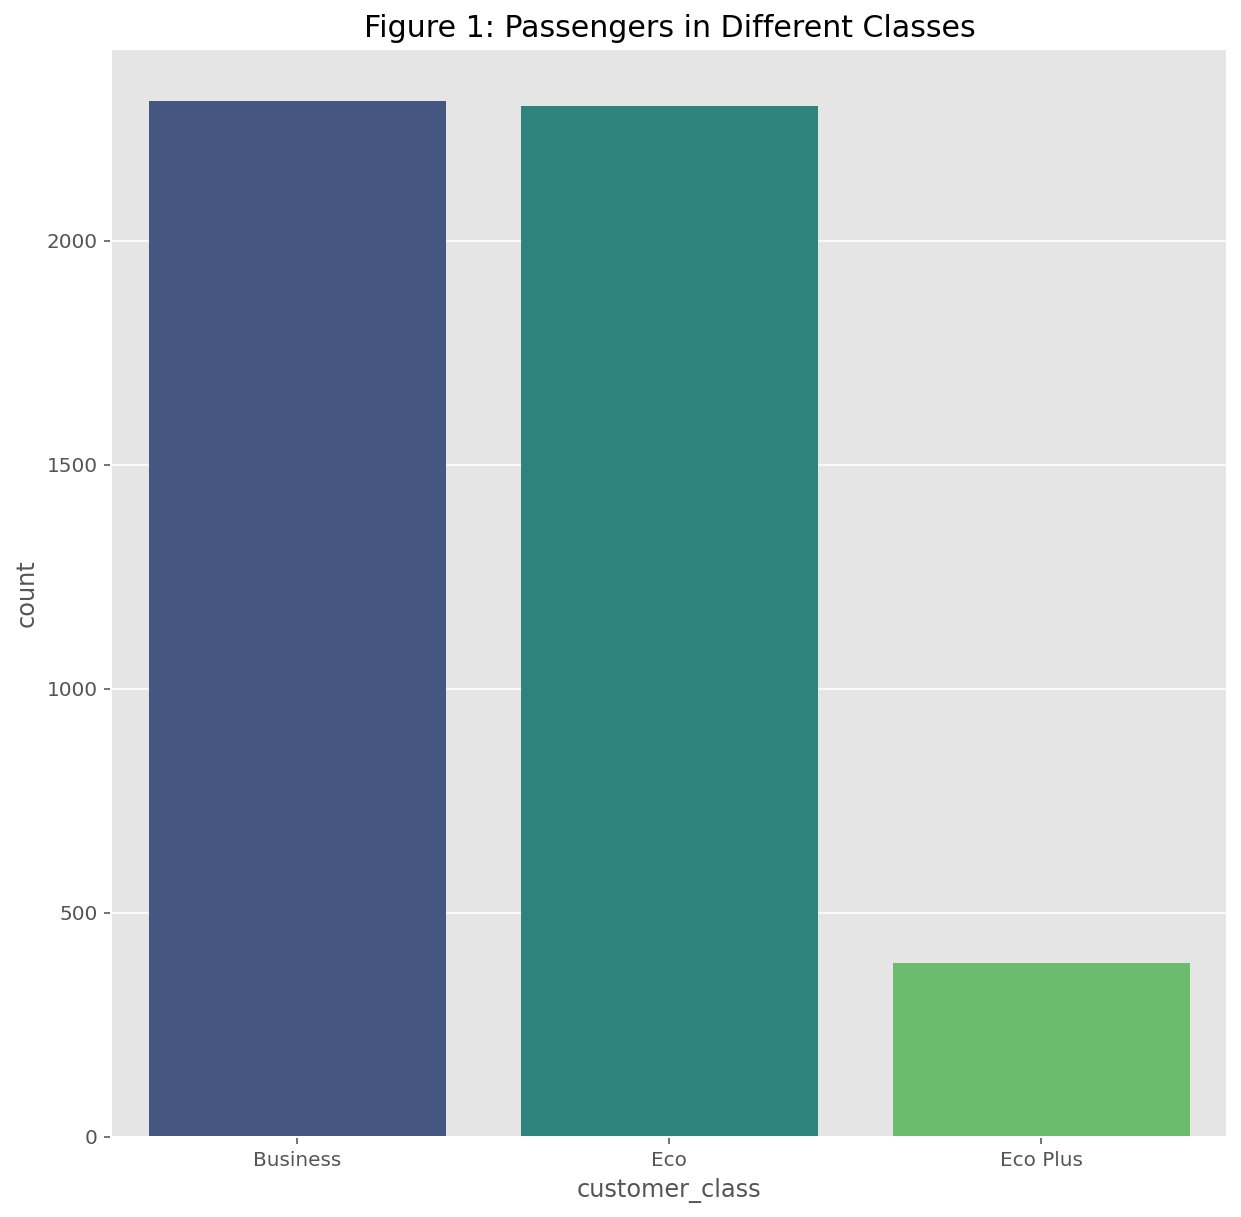

In [17]:
plt.figure(figsize = (10, 10))
fig_1 = sns.countplot(x = 'customer_class', data = csc, palette = 'viridis', 
                    order = csc['customer_class'].value_counts().index)
fig_1 = plt.title('Figure 1: Passengers in Different Classes', fontsize = 15)
plt.show()

#### Bar Chart: Satisfaction

From figure 2, most of the passengers are showing `neutral or dissatisfied` attitude to this airline. However, the differences between `neutral or dissatisfied` and `satisfied` are not extremely great.

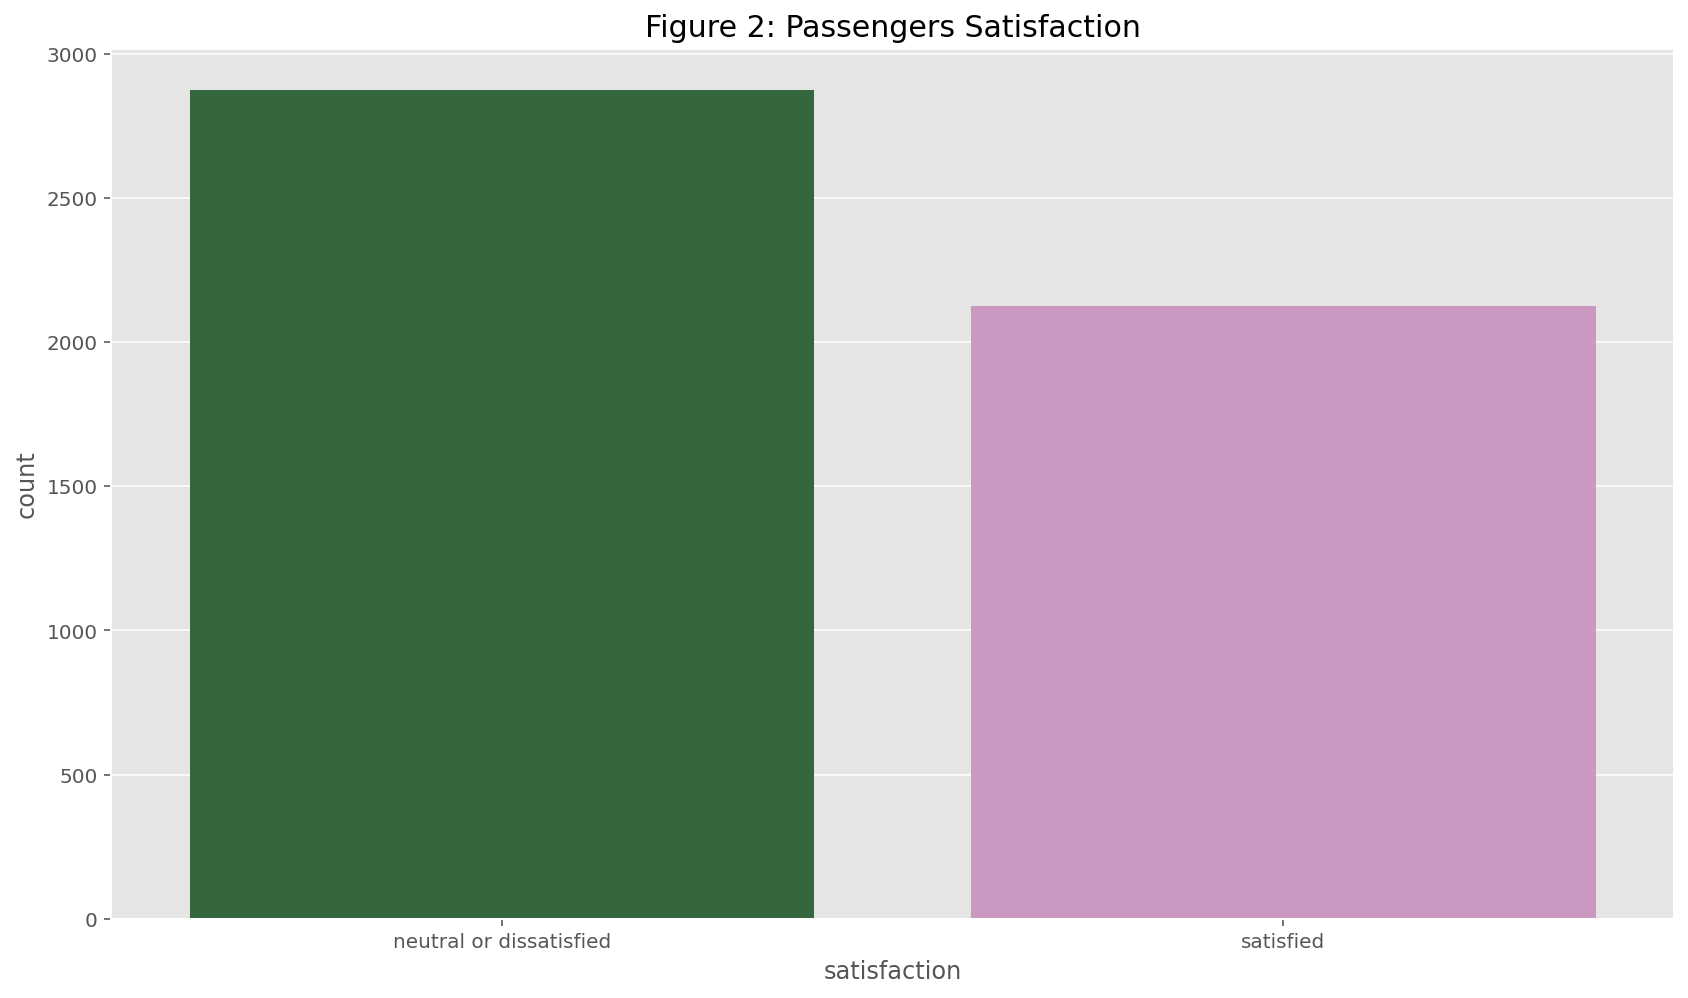

In [25]:
plt.figure(figsize = (14, 8))
fig_2 = sns.countplot(x = 'satisfaction', data = csc, palette = 'cubehelix', 
                    order = csc['satisfaction'].value_counts().index)
fig_2 = plt.title('Figure 2: Passengers Satisfaction', fontsize = 15)
plt.show()

#### Boxplot & Histogram: Flight Distance

We can see in figures 3A and 3B that the distribution of flight distance is clearly right-skewed and has a distant range, which indicates that most of the passengers traveled in a short distance.

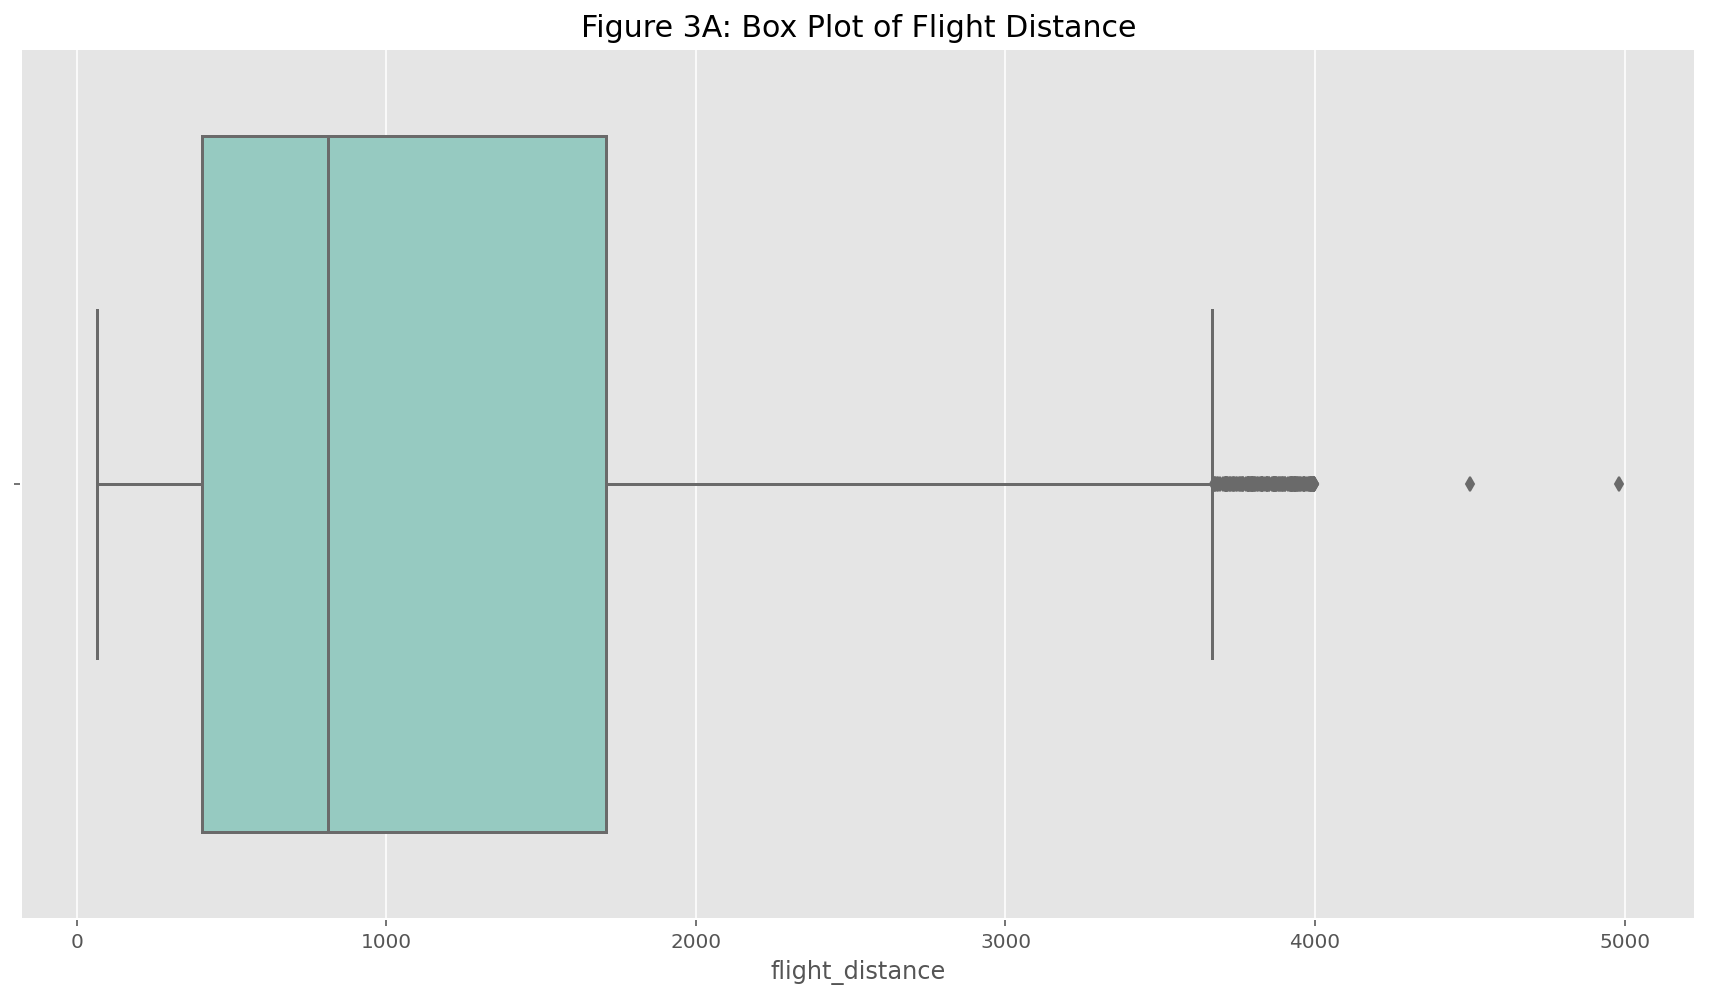

In [26]:
# Boxplot of Flight Distance
plt.figure(figsize = (15, 8))
fig_3a = sns.boxplot(csc['flight_distance'], palette="Set3").set_title('Figure 3A: Box Plot of Flight Distance', fontsize = 15)
plt.show()

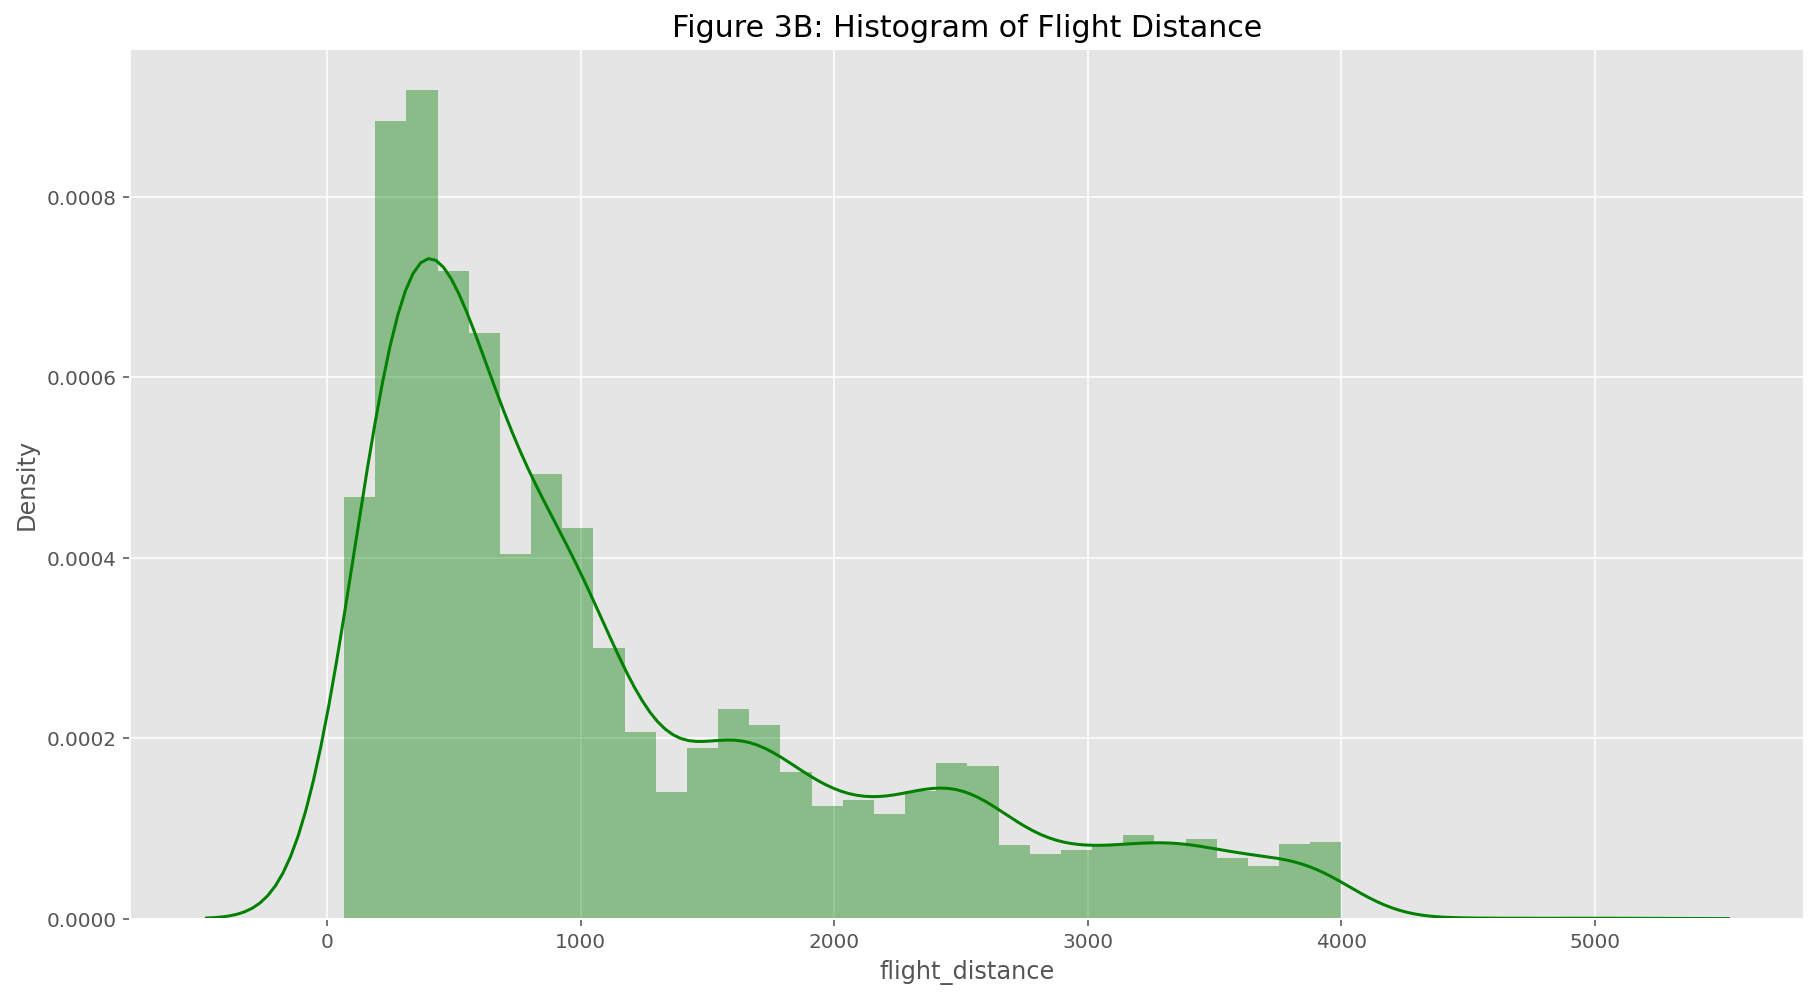

In [27]:
# Histogram of Flight Distance
plt.figure(figsize = (15, 8))
fig_3b = sns.distplot(csc['flight_distance'], color="g", kde=True, bins=40).set_title('Figure 3B: Histogram of Flight Distance', fontsize = 15)
plt.show()

### Two-Variable Visualisation

#### Boxplot: Flight Distance and Type of Travel

From figure 4, we can see that Business Travel type of flight distance have overall a higher distance compared to the Personal Travel Type. The amount of People who use business travel in a long distance are greater than the personal travel one. 

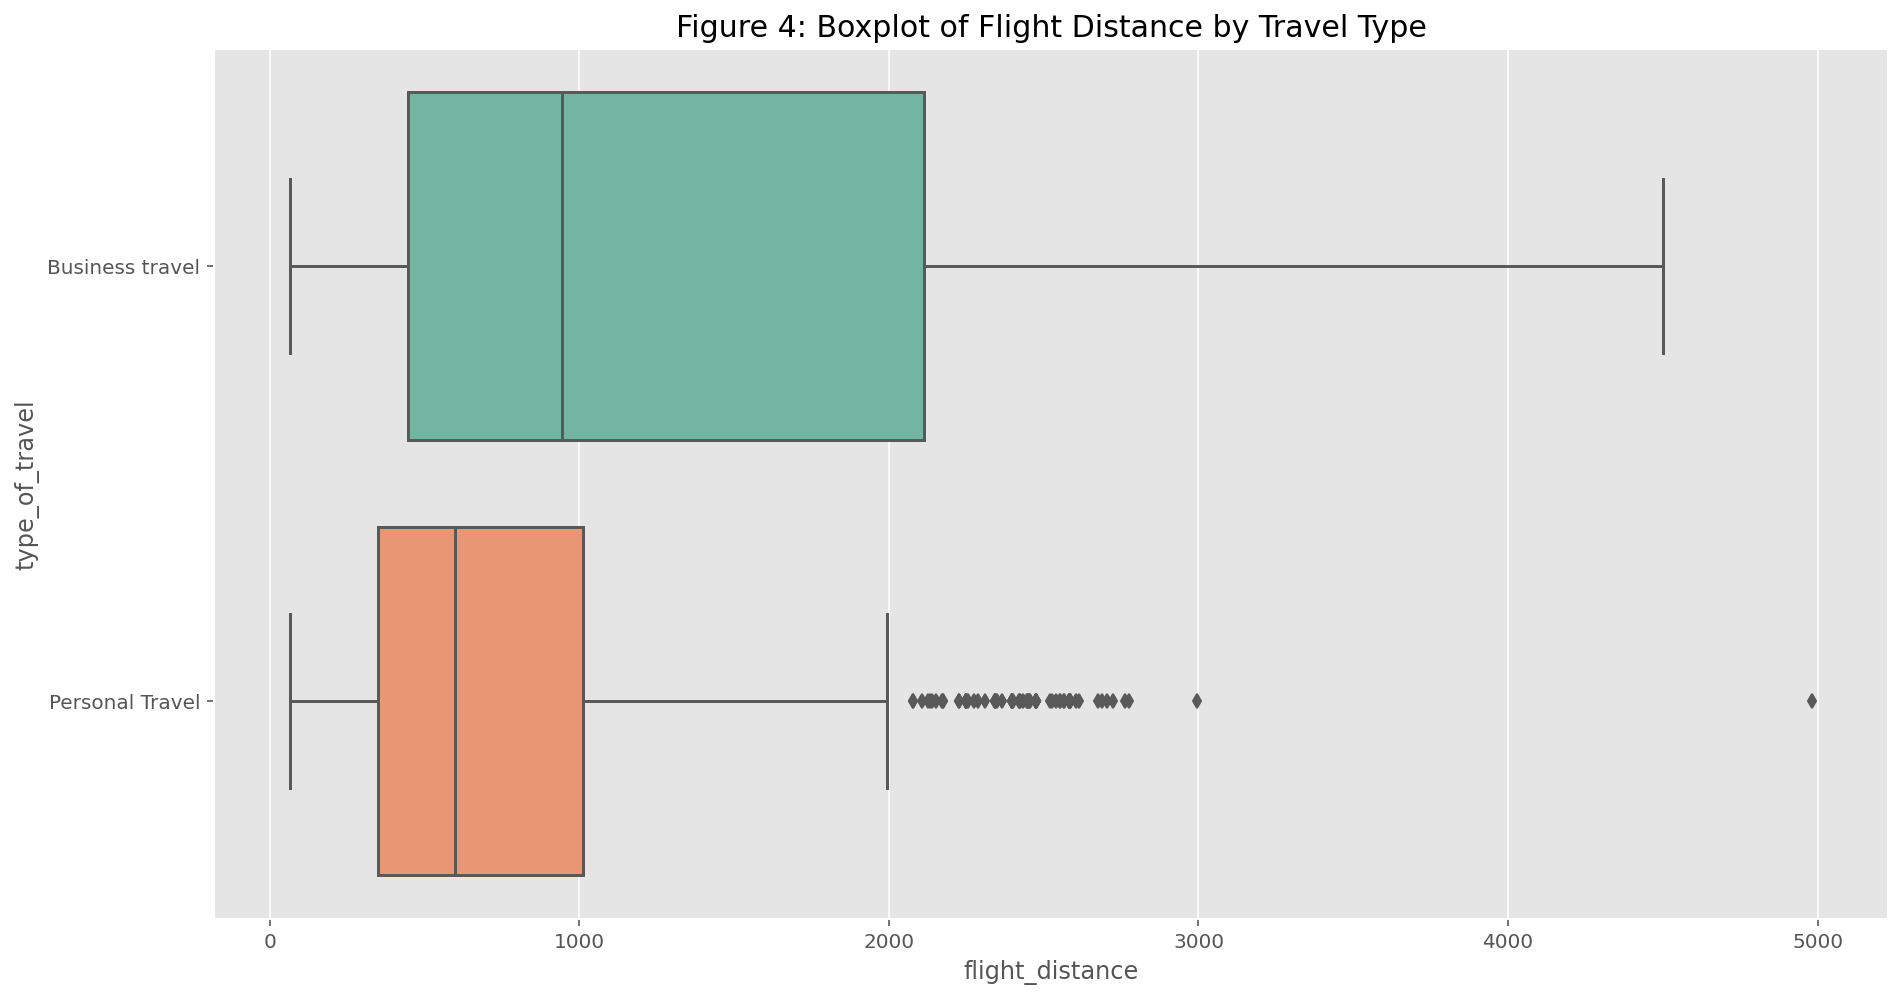

In [28]:
# Boxplot of Flight Distance by Travel Type
plt.figure(figsize = (15, 8))
sns.boxplot(csc['flight_distance'], csc['type_of_travel'], palette="Set2")
plt.title('Figure 4: Boxplot of Flight Distance by Travel Type', fontsize = 15)
plt.show()

#### Boxplot: Flight Distance by Customer Satisfaction

From Figure 5, we know that most people who have a long distance travel are satisfied with this airline. Compare with long distance travel, people who travel in a short distance are neutral or dissatisfied with this airline.

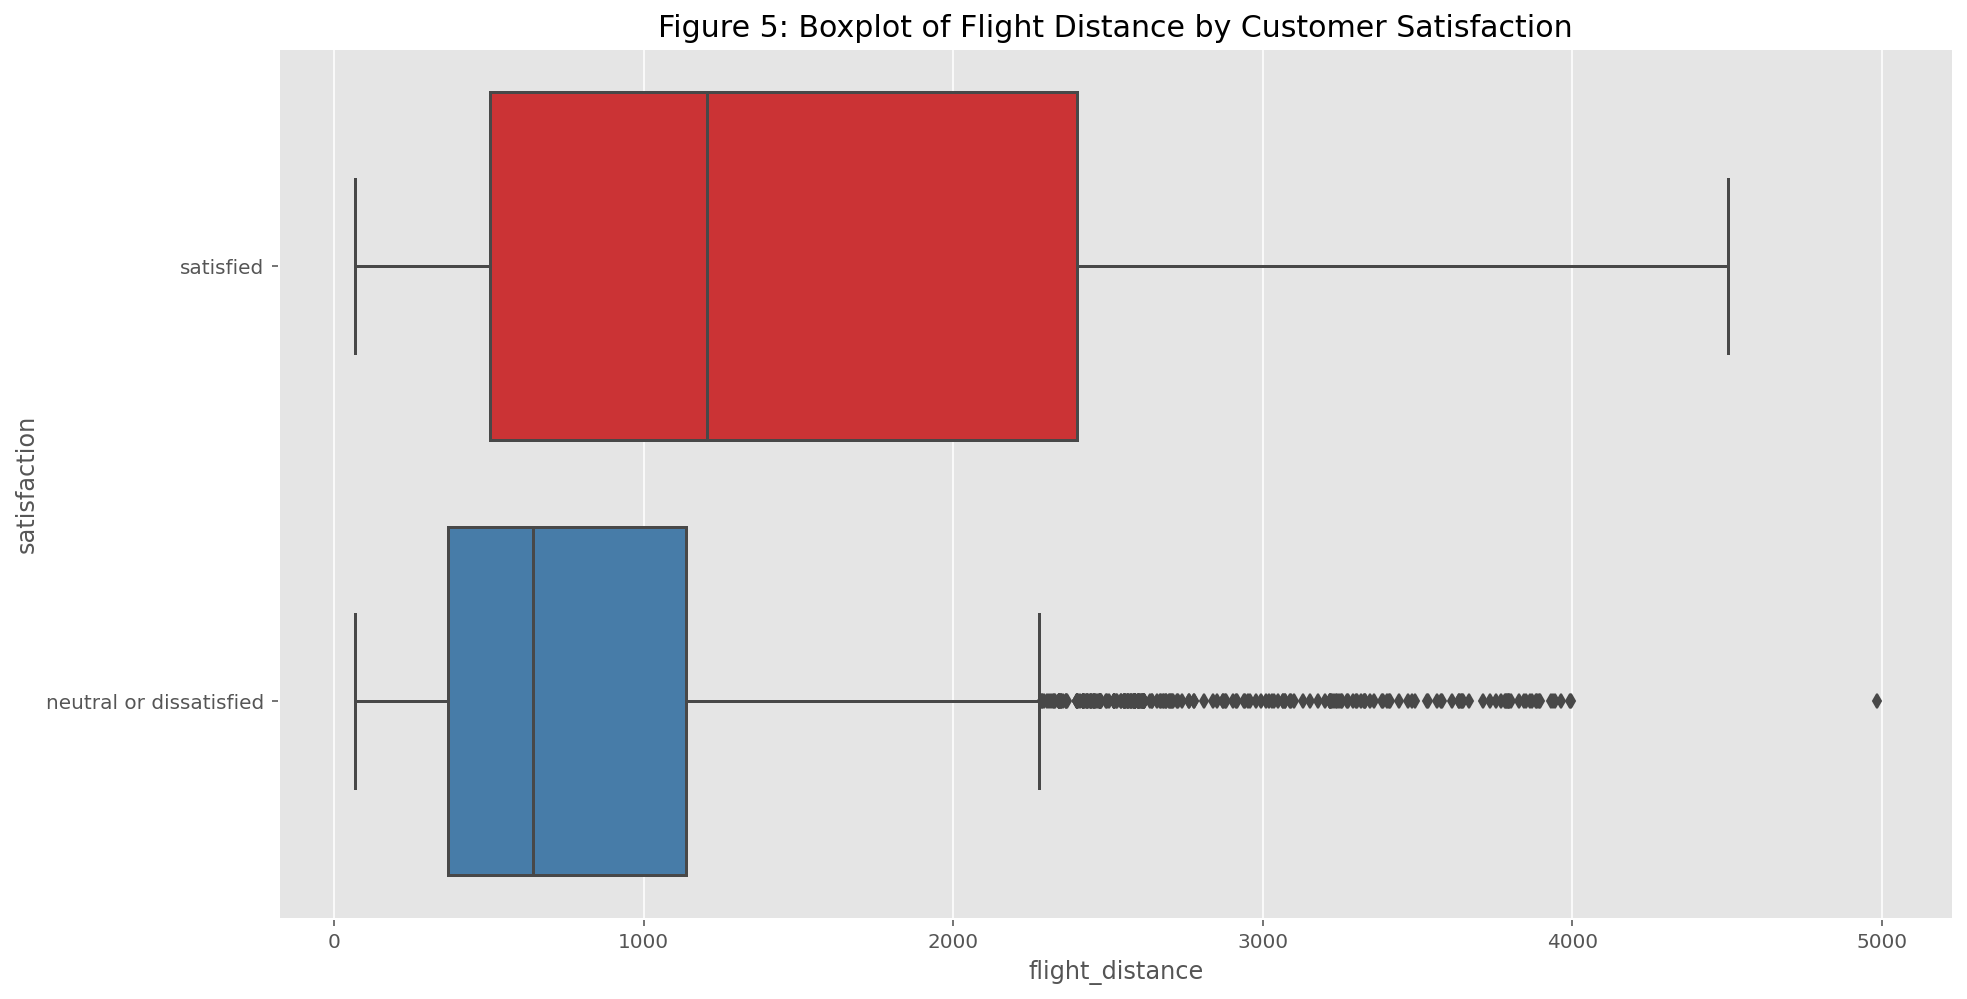

In [29]:
# Boxplot of Flight Distance by Customer Satisfaction
plt.figure(figsize = (15, 8))
sns.boxplot(csc['flight_distance'], csc['satisfaction'], palette="Set1")
plt.title('Figure 5: Boxplot of Flight Distance by Customer Satisfaction', fontsize = 15)
plt.show()

#### Boxplot: Flight Distance by Customer Class

From figure 6, most people who have a long distance travel are experiencing Business Class. 

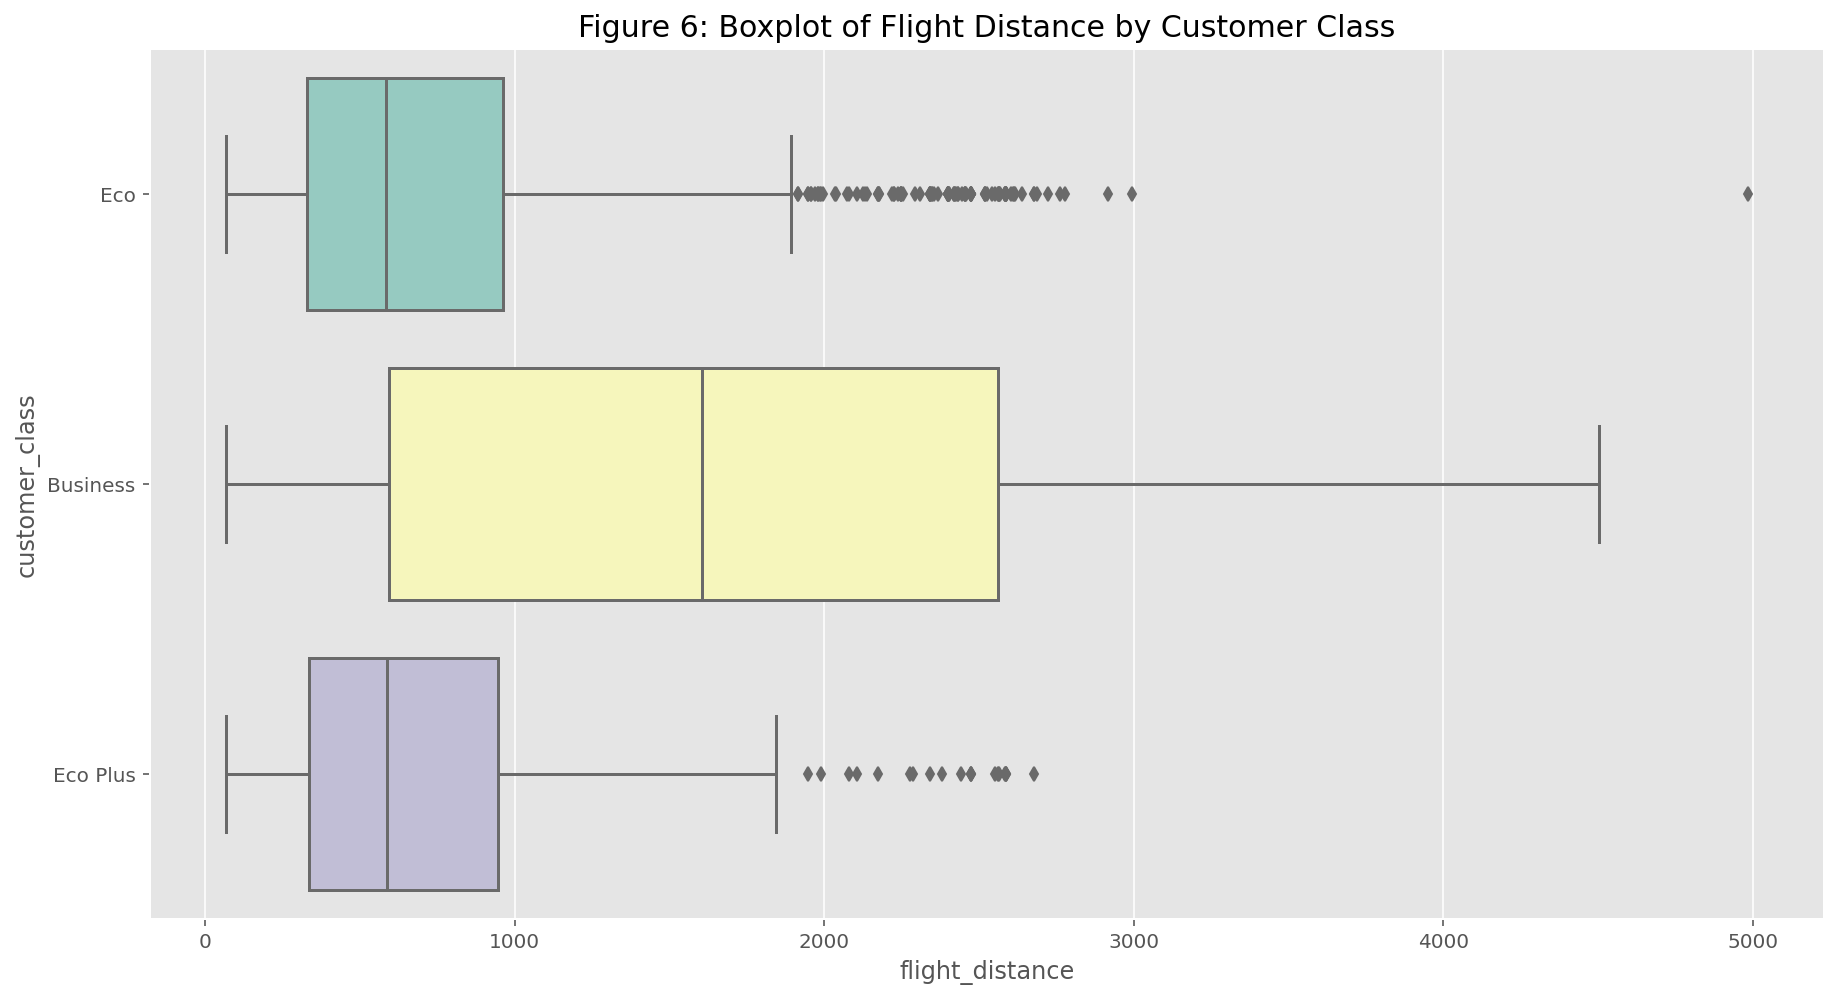

In [30]:
# Boxplot of Flight Distance by Customer Class
plt.figure(figsize = (15, 8))
sns.boxplot(csc['flight_distance'], csc['customer_class'], palette="Set3")
plt.title('Figure 6: Boxplot of Flight Distance by Customer Class', fontsize = 15)
plt.show()

### Three-Variable Visualisation

#### Boxplot: Flight Distance by Customer Satisfaction and Customer Class

From figure 7, the comparison between `flight distance` and `customer satisfaction` in different `customer class` is clearly comparable.

For `Eco` and `Eco Plus` classes, most people traveling in a short distance are neutral or dissatisfied with this airline. For the `Business` class, most people traveling in a long distance are satisfied with this airline.

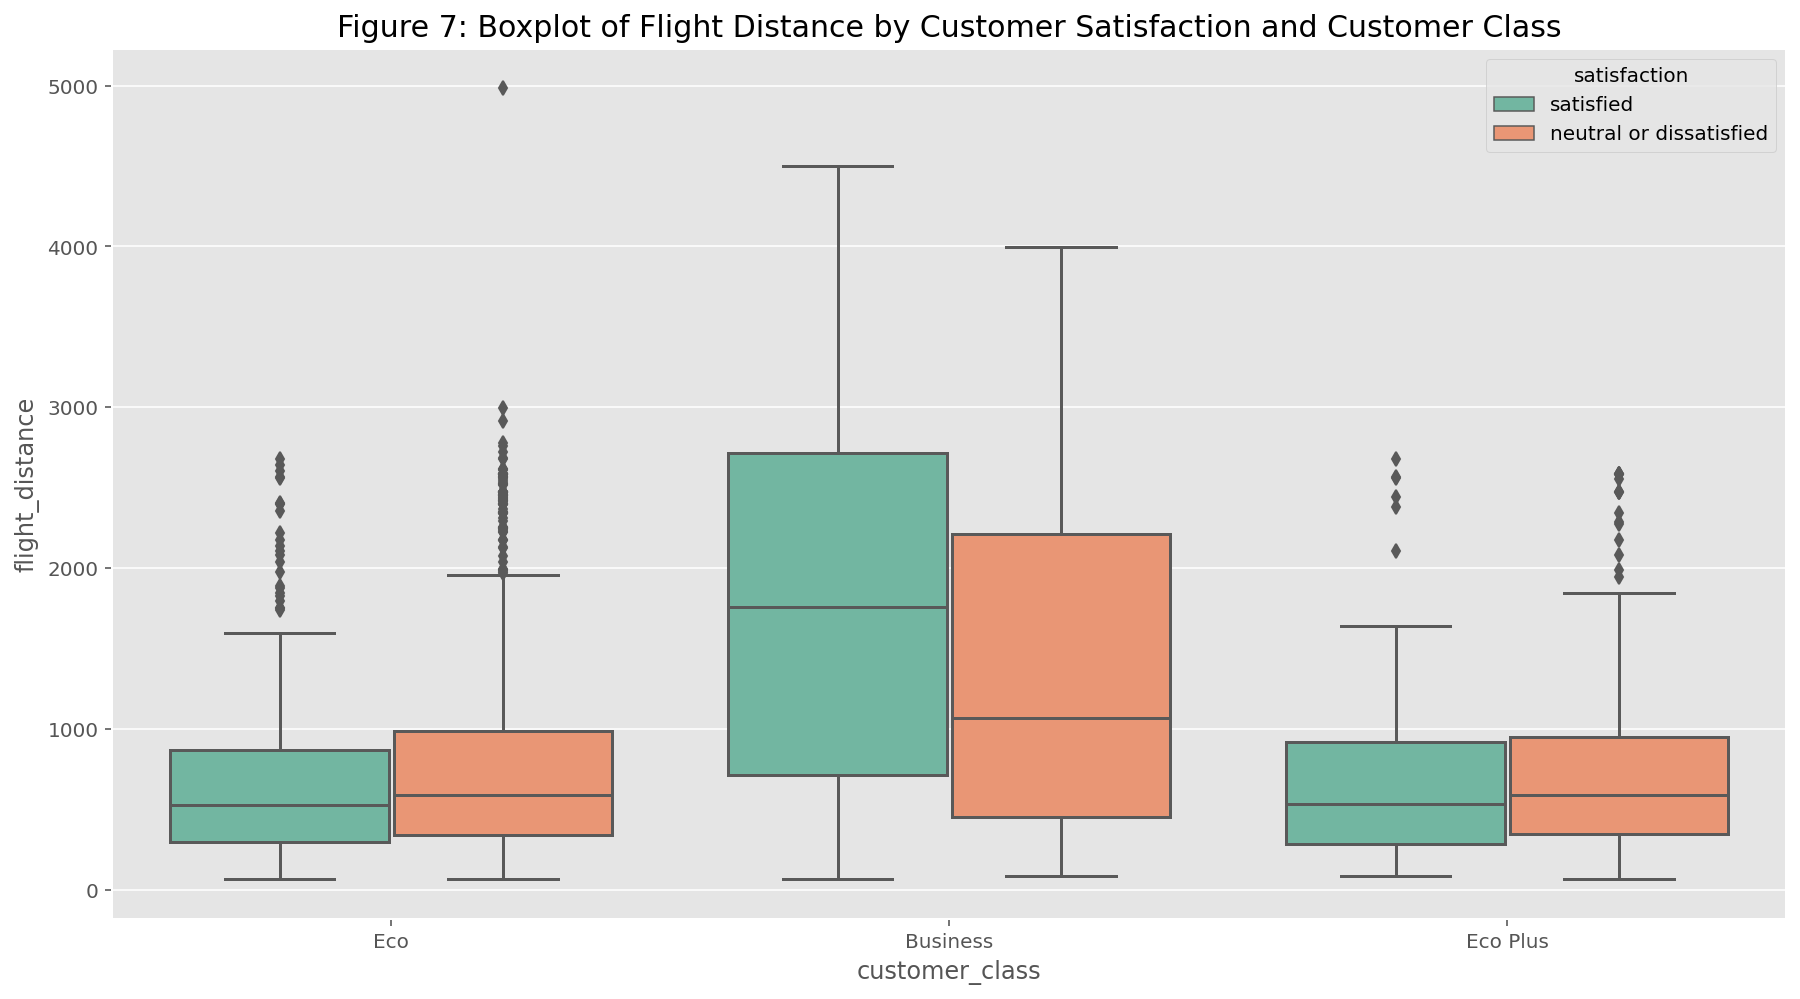

In [31]:
# Boxplot of Flight Distance by Customer Satisfaction and Customer Class
plt.figure(figsize = (15, 8))
sns.boxplot(csc['customer_class'], csc['flight_distance'], 
            hue = csc['satisfaction'], palette="Set2")
plt.title('Figure 7: Boxplot of Flight Distance by Customer Satisfaction and Customer Class', fontsize = 15)
plt.show()

#### Boxplot: Flight Distance by Customer Satisfaction and Customer Type

From figure 8, we can clearly see that the `Loyal Customer` has overall longer distances than the `Disloyal Customer`.

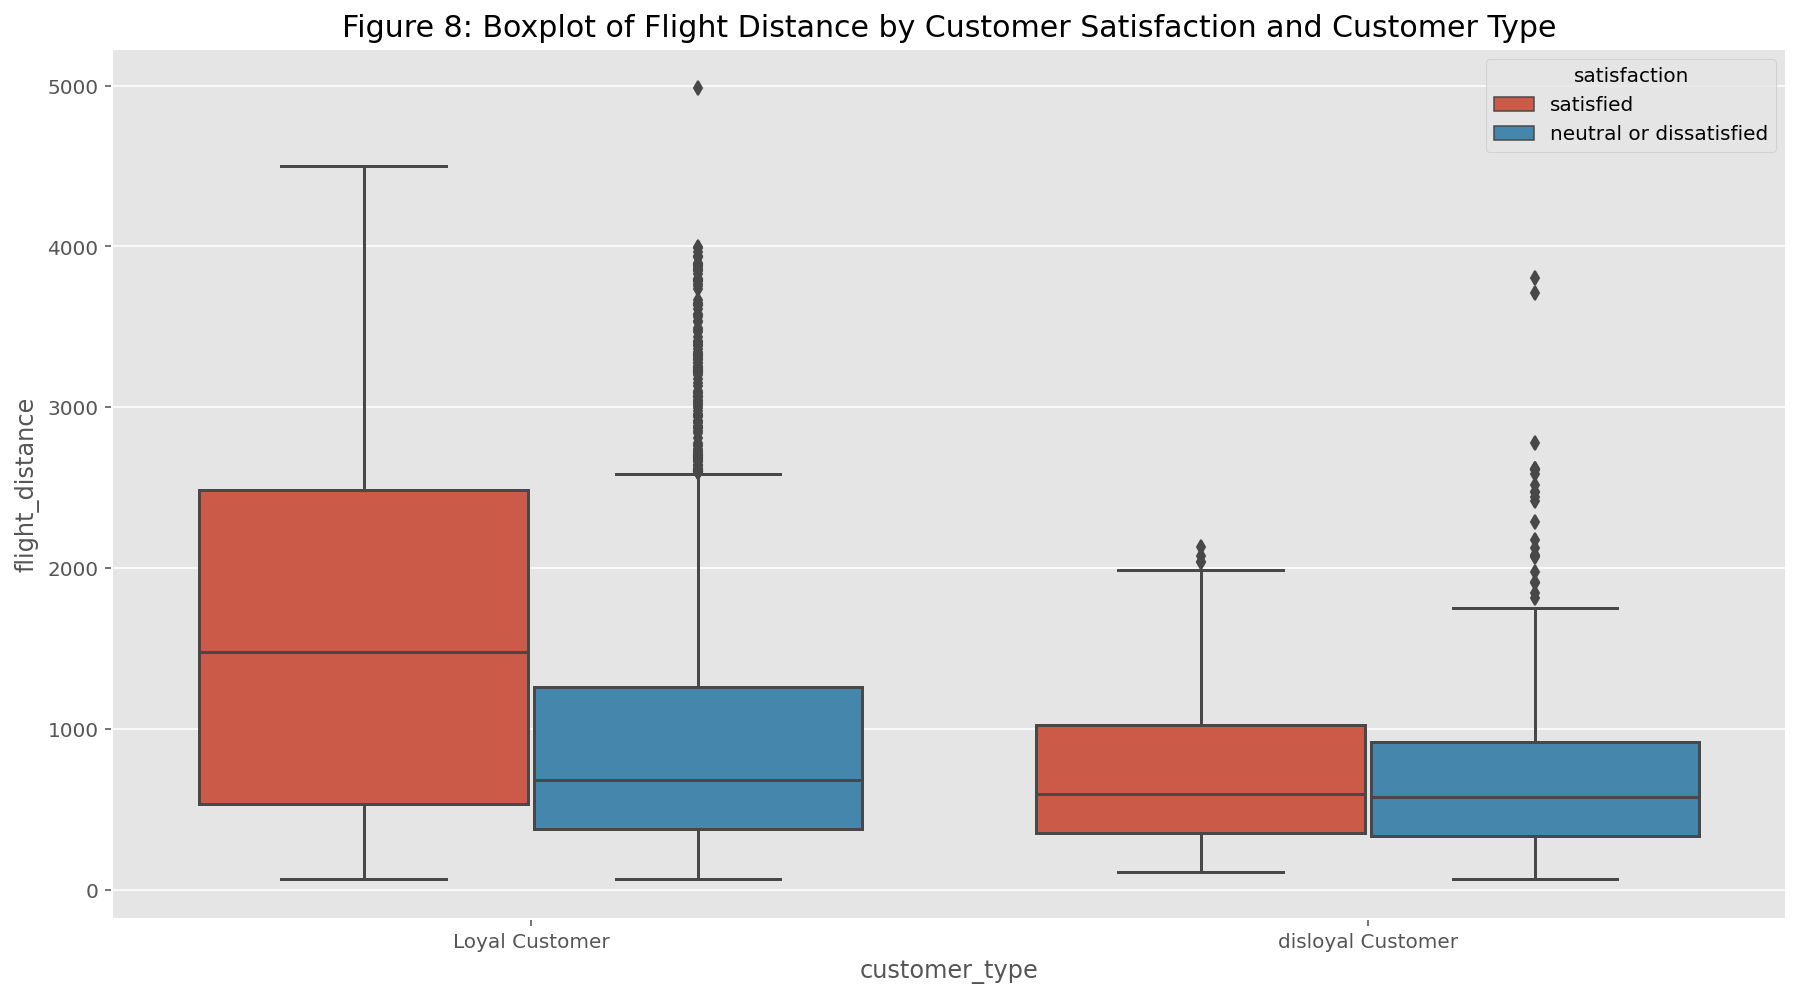

In [33]:
# Boxplot of Flight Distance by Customer Satisfaction and Customer Type
plt.figure(figsize = (15, 8))
sns.boxplot(csc['customer_type'], csc['flight_distance'], 
            hue = csc['satisfaction'])
plt.title('Figure 8: Boxplot of Flight Distance by Customer Satisfaction and Customer Type', fontsize = 15)
plt.show()

#### Scatterplot: Flight Distance by Time of Departure Delay and Satisfaction

Figure 9 shows that many people are neutral or dissatisfied when they travel in a short distance and have long departure delay time.

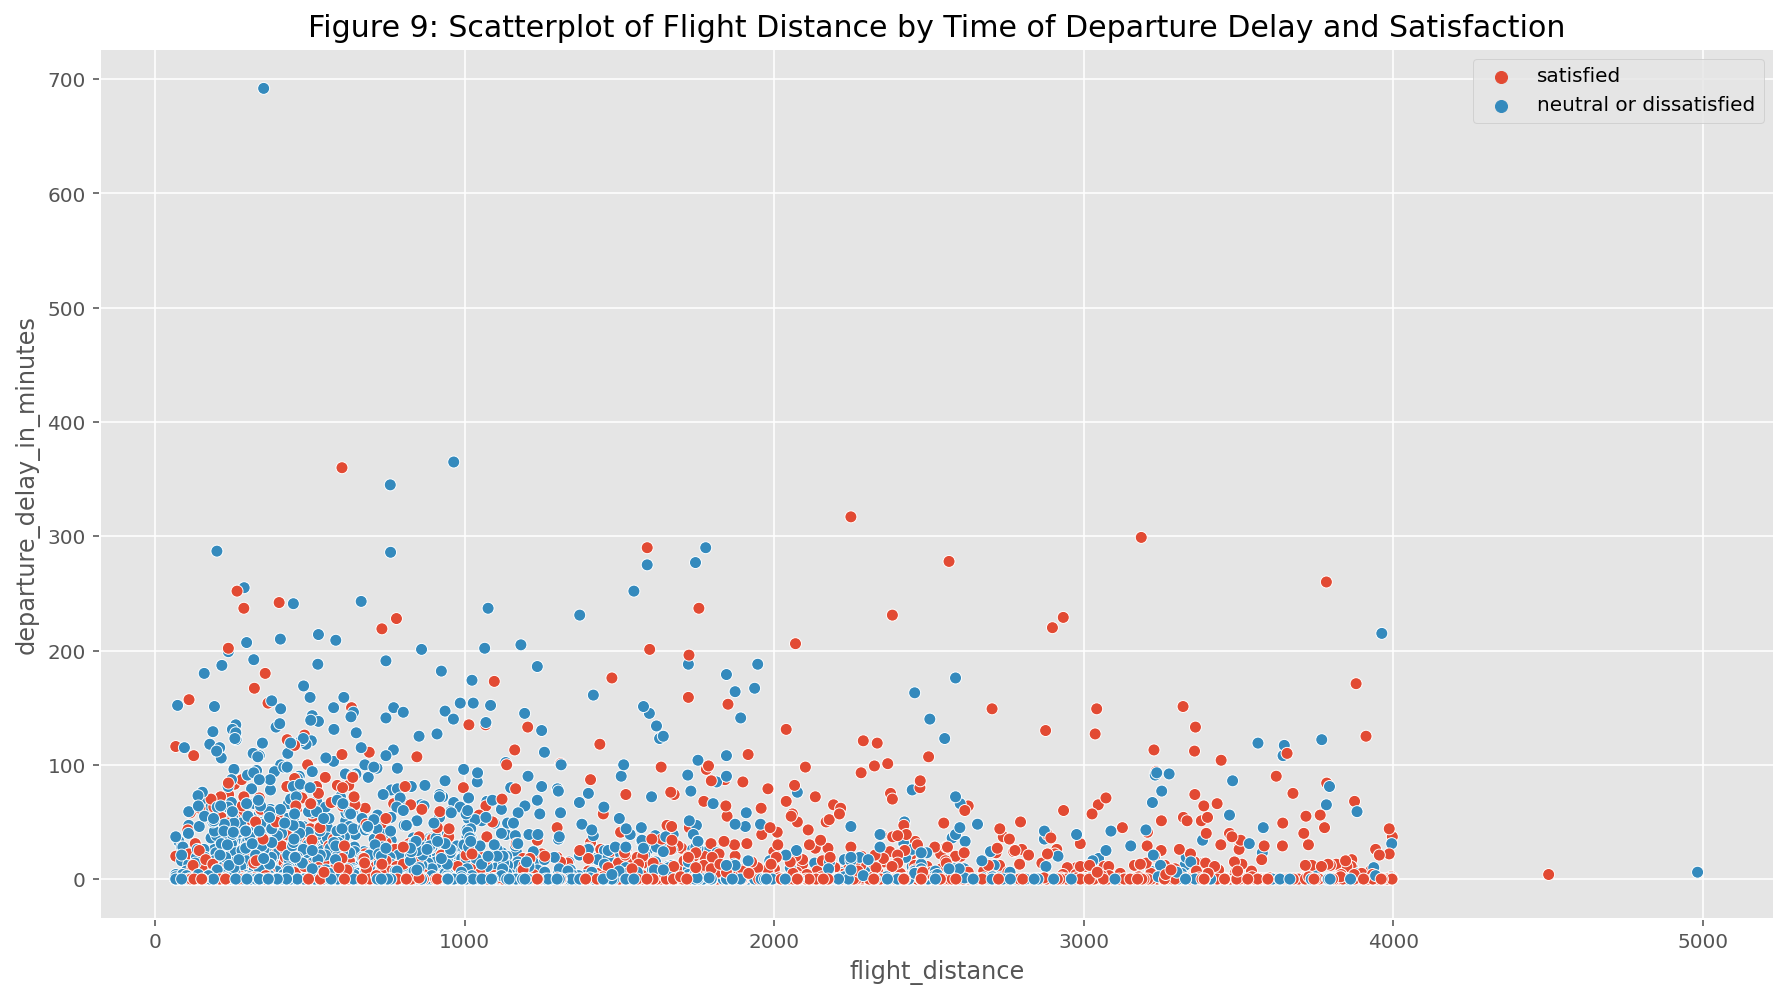

In [34]:
#### Scatterplot of Flight Distance by Time of Departure Delay and Satisfaction
plt.figure(figsize = (15, 8))
sns.scatterplot(csc['flight_distance'], csc['departure_delay_in_minutes'], hue = csc['satisfaction'])
plt.title('Figure 9: Scatterplot of Flight Distance by Time of Departure Delay and Satisfaction', fontsize = 15)
plt.legend(loc = 'upper right')
plt.show()

## Literature Review <a id='Review'></a>

To many, defining a good airline company is hard. It is hard to have an absolute standard to rate an airline. It is often very abstract for people to explain in a few words. However, there is a system called Airline Quality Rating Index (AQR). The Airline Quality Rating (AQR) was developed and first announced in early 1991 as an objective method for assessing airline quality on combined multiple performance criteria.(Bowen & Headley, 2019) This system sets the industry standard, providing consumers and aviation industry professionals a means to compare performance quality among airlines using objective, performance-based data.(Kuhn, 2017) On-time performance (OT), denied boardings (DB), mishandled baggage (MB) and customer complaints (CC) are the four criteria to calculate the result of AQR. (Kalemba & Planas, 2017) For example, there is a report written by Berger (1993) and Wang (2013) show that delay in the service late check-in, delay in the dispatch of luggage, delay in on-board service and take-off delay, are the main factors that generate dissatisfaction among airline passengers, these factors will be take account by the AQR system. The result of AQR can encourage airline to invest more on their advantages and improve their weakness such as the quality of services. (Kalemba & Planas, 2017). Although AQR is recognised and used by expert, the majority of airline passengers are concerned with two basic aspects of airline service: 1) schedule and 2) price. (Dean & Brent, 1998) That is, if an airline can provide a well scheduled and cheap ticket to passenger, most likely passenger will be satisfied.

Also, service failures can help airline to understand consumer’s perspective although it can be costly. Airline have to compensate a huge amount of money to the passenger. For example, in April 2017, United Airlines shares dropped $1.4 billion (4%) during the second day after a public relations crisis caused by overbooking that resulted in a passenger being forcibly dragged off that overbooked flight. (Xu, Liu and Gursoy, 2018) Although airline have to pay lots of money to passenger, but they can understand the perspective of their customers and have the ability to try to improve their insufficient. According to Xu, examining the role of customer emotions during service failures can help airline company understand customer’s expectations and those expectations are the factors that airline can improve to change their customer satisfaction level. (Xu, Liu and Gursoy, 2018) Moreover, service failures can let airlines to understand the importance of passenger’s comment. Airline can improve according to the feedback of passenger and prevent to make the same mistake. Therefore, having a mistake can help airline to treat the opinion of passenger seriously and improve their service quality.

In conclusion, it is not easy to change the satisfaction level of passengers. Airlines need to go through many recoveries process and use lots of money in order to recreate their reputation and gain back their trust from passengers. (Waguespack & Rhoades, 2008) Although this process may take a long time to completed, but after the reform of the airline, the satisfaction level of the airline should be improved and airline competitiveness in the market will increased. However, for some small airlines, they may have no chance to recover or improve. Because their capital is not much compared with big airline company. When they are facing service failures, they may not have enough fund to deal with the problems. It lead to bankrupt and eventually close down of a business due to the huge loss of capital because of compensation. Therefore, not every airline can improve the satisfaction level of passenger when facing a service crisis. 


## Summary and Conclusion <a id='Summary_And_Conclusion'></a>

An accurate prediction model for satisfaction level of airline passengers can benefit many airline company. A trustworthy model can improve airline's quality of service and increase their competitiveness. The goal of for this project is to make a model to predict the satisfaction level of airline passengers using the Airline Passenger Satisfaction dataset.

In Phase 1 of this project, we completed the data cleaning & preprocessing and data visualisation tasks. We have decided to drop the variables that contain similar information. For example, `inflight_wifi_service` and `inflight_entertainment` are dropped because they can be explained by using `inflight_service` variable. Likewise, `ease_of_online_booking` and `online_boarding` are also dropped because of the `onboard_service` variable. We also dropped the `arrival_delay_in_minutes` variable because it contains missing values which means there is no use for that variable. After that, we ensure all values in `gender` variable are marked as Male and Female and sampled random rows for our Phase 2 project.

For data visualisation, we created some graph to explain variables in the dataset. By using the explanatory variables, we can concluded that the overall ratio of passenger felt neutral or dissatisfied are higher than satisfied. When comparing short and long distance flight, people keen on choose business class if they have a long flight distance and their satisfied ratio are highest compared with Eco class and Eco plus class. Therefore, passengers tend to feel neutral or not satisfied when they are travelling without business class in any distance. 

In conclusion, types of customer class, travel distance and delay time are the main variables to determine the satisfaction level of passengers. Further analysis needs to be done in Phase 2 in order to identify further relationships.

## References <a id='References'></a>

Klein, T. (2019). Airline Passenger Satisfaction. Retrieved 2 October 2021, from https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

Headley, D., & Bowen, B. (1998). International Airline Quality Measurement. Retrieved 2 October 2021, from https://rosap.ntl.bts.gov/view/dot/13939

Bowen, B., & Headley, D. (2019). Airline Quality Rating 2019: The 29th year reporting airline performance ﻿. Retrieved 2 October 2021, from https://soar.wichita.edu/handle/10057/16422

Kalemba, N., & Campa-Planas, F. (2017). The Quality – Profitability Link in the US Airline Business: A Study Based on the Airline Quality Rating Index. Retrieved 30 September 2021, from https://www.sciencedirect.com/science/article/pii/S1877705817319100

Kuhn, M. (2017). Airline Quality Research: A Student’s Perspective. Retrieved 2 October 2021, from https://commons.erau.edu/pr-discovery-day/2017/posters-and-demonstrations-presentations/21/

Berger, C., Blauth, R., Boger, D., Bolster, C., Burchill, G., Dumouchel, W., …. Walden, D. (1993), “Kano’s methods for understanding customer-defined quality”, Retrieved 2 October 2021, from Center for Quality of Management Journal, Vol. 2 No. 4, pp. 2-36.

Wang, C.H. (2013), “Incorporating customer satisfaction into the decision-making process of product configuration: a fuzzy Kano perspective”. Retrieved 2 October 2021, from  International Journal of Production Research, Vol. 51 No. 22, pp. 6651-6662.

Waguespack, B., & Rhoades, D. (2008). Twenty years of service quality performance in the US airline industry | Emerald Insight. Retrieved 2 October 2021, from https://www.emerald.com/insight/content/doi/10.1108/09604520810842821/full/html?fullSc=1

Xu, X., Liu, W., & Gursoy, D. (2018). The Impacts of Service Failure and Recovery Efforts on Airline Customers’ Emotions and Satisfaction - Xun Xu, Wenhui Liu, Dogan Gursoy. Retrieved 1 October 2021, from https://journals.sagepub.com/doi/abs/10.1177/0047287518789285?casa_token=iv3dhfS0rQcAAAAA%3A6p9PjQef-iJX1yvLjvl016Q_xzkyCY01tfYWn9eJCBQ6aSkxpMb1pN1hZIZrQOt9khDoZ2ghYBRBGPU&journalCode=jtrb